In [30]:
import yfinance as yf
from src.TimeSeries import TimeSeries
from src.TimeSeriesPlot import TimeSeriesPlot
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [31]:
# Descargar precios de MELI
mercadolibre = 'MELI'
nasdaq = '^IXIC'
date = '2022-01-01'
muestreo = '1wk' # semanal

meli = yf.download(mercadolibre, start=date, interval=muestreo)
dates = meli.index
meli_prices = meli['Close'][mercadolibre]
ts_meli = TimeSeries(f'{mercadolibre}', dates, meli_prices)
ts_meli_base100 = ts_meli.normalize_base100()

nasdaq_df = yf.download(nasdaq, start=date, interval=muestreo)
dates = nasdaq_df.index
nasdaq_prices = nasdaq_df['Close'][nasdaq]
ts_nasdaq = TimeSeries(f'{nasdaq}', dates, nasdaq_prices)
ts_nasdaq_base100 = ts_nasdaq.normalize_base100()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


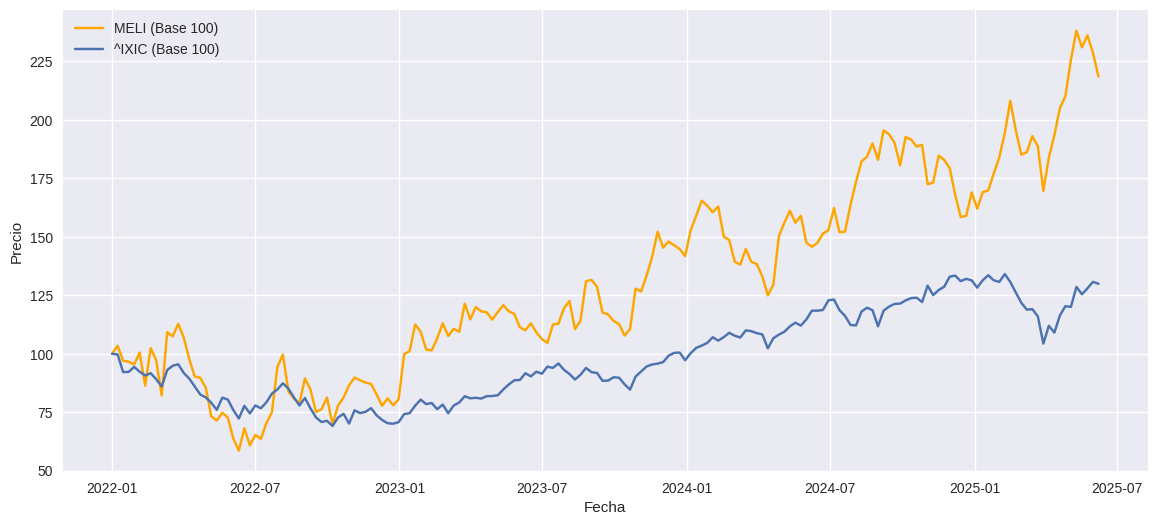

In [32]:
plot = TimeSeriesPlot(ts_meli_base100)
plot.add_original()
plot.add_another(ts_nasdaq_base100)
plot.show()

In [35]:
# Descargar precios de MELI
muestreo = '1mo' # mensual

meli = yf.download(mercadolibre, start=date, interval=muestreo)
dates = meli.index
meli_prices = meli['Close'][mercadolibre]
ts_meli = TimeSeries(f'{mercadolibre}', dates, meli_prices)

nasdaq_df = yf.download(nasdaq, start=date, interval=muestreo)
dates = nasdaq_df.index
nasdaq_prices = nasdaq_df['Close'][nasdaq]
ts_nasdaq = TimeSeries(f'{nasdaq}', dates, nasdaq_prices)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


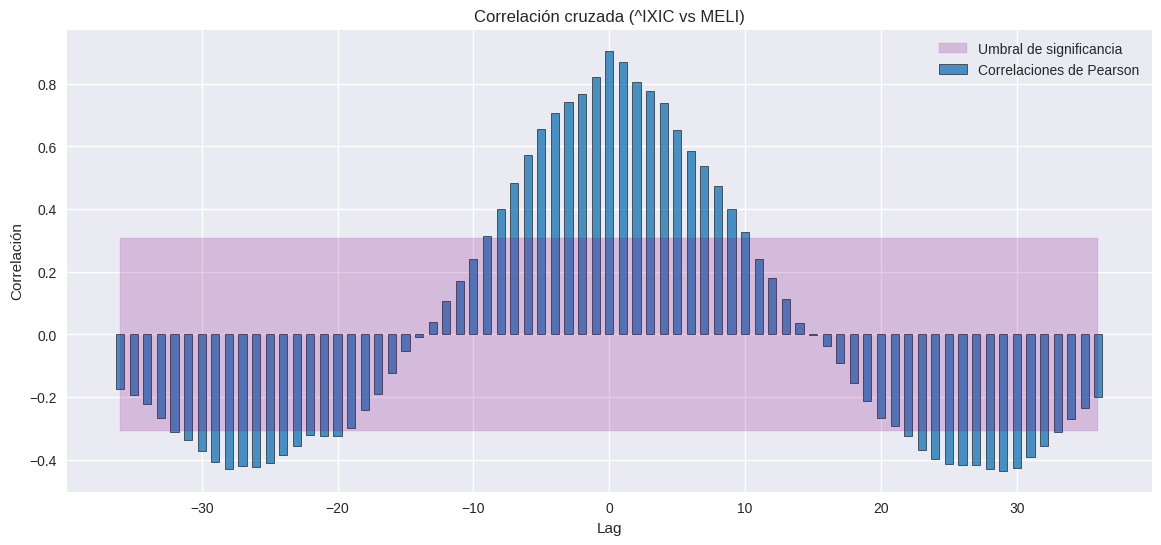

In [37]:
plot = TimeSeriesPlot(ts_nasdaq)
plot.add_cross_correlation_plot(ts_meli, 36)

MELI y Nasdaq están fuertemente correlacionadas (aprox 0.9).

Hay una correlación negativa significativa en -30, es decir, Nasdaq 30 meses antes VS MELI actualidad, lo que significa que un aumento en Nasdaq hace 30 meses está relacionado con una disminución del precio de MELI en la actualidad. Lo mismo para el lag +30.